In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.resnet50 import preprocess_input, ResNet50
import keras.models
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions

In [48]:
model = keras.models.load_model('my_model')

In [49]:
IMAGE_SIZE = (160, 160)
BATCH_SIZE = 32
NUM_CLASSES = 4

data_gen = image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split = 0.2,
    #rescale=1./255.
)

train_ds = data_gen.flow_from_directory(
    'dataset',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    seed=420
)

val_ds = data_gen.flow_from_directory(
    'dataset',
    target_size=IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    subset='validation',
    seed=420
)
   
print(train_ds, val_ds)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
<tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x1a58aa1510> <tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x1a58aa19d0>


In [50]:
def get_batch_preds(dataset, i):
    batch = dataset[i]
    batch_imgs = batch[0]
    batch_labels = batch[1]
    batch_preds = model.predict(batch_imgs)
    
    return batch_labels, batch_preds

In [51]:
# true labels, predicted labels
first_labels, first_preds = get_batch_preds(val_ds, 0)

In [52]:
# labels are in integers, so I used val_ds.filepaths to determine the label names
label_names = ['cheetah', 'jaguar', 'leopard', 'snow leopard']
label_names

['cheetah', 'jaguar', 'leopard', 'snow leopard']

In [53]:
# display batch for evaluation
# since each batch has 32 items, we will display 16 for visual purposes
def plot_batch(pred_arr, true_arr, img):
    #idxs = np.arange(0, 32, 2)
    
    plt.figure(figsize=(16,16))
    
    for i in range(16):
        x = i % 4
        y = i // 4
        
        #axarr[x,y].grid(False)
        #axarr[x,y].xticks([])
        #axarr[x,y].yticks([])
        #axarr[x,y].imshow(img[i])
        
        plt.subplot(4, 4, i+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img[i])
        
        pred_label = np.argmax(pred_arr[i*2])
        if pred_label == np.argmax(true_arr[i*2]):
            color = 'green'
        else:
            color = 'red'
        
        plt.xlabel('Pred: {} {:2.0f}%\nTrue: {}'.format(label_names[pred_label],
                                                             100*np.max(pred_arr[i*2]),
                                                             label_names[np.argmax(true_arr[i*2])]),
                         color=color)
    return

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

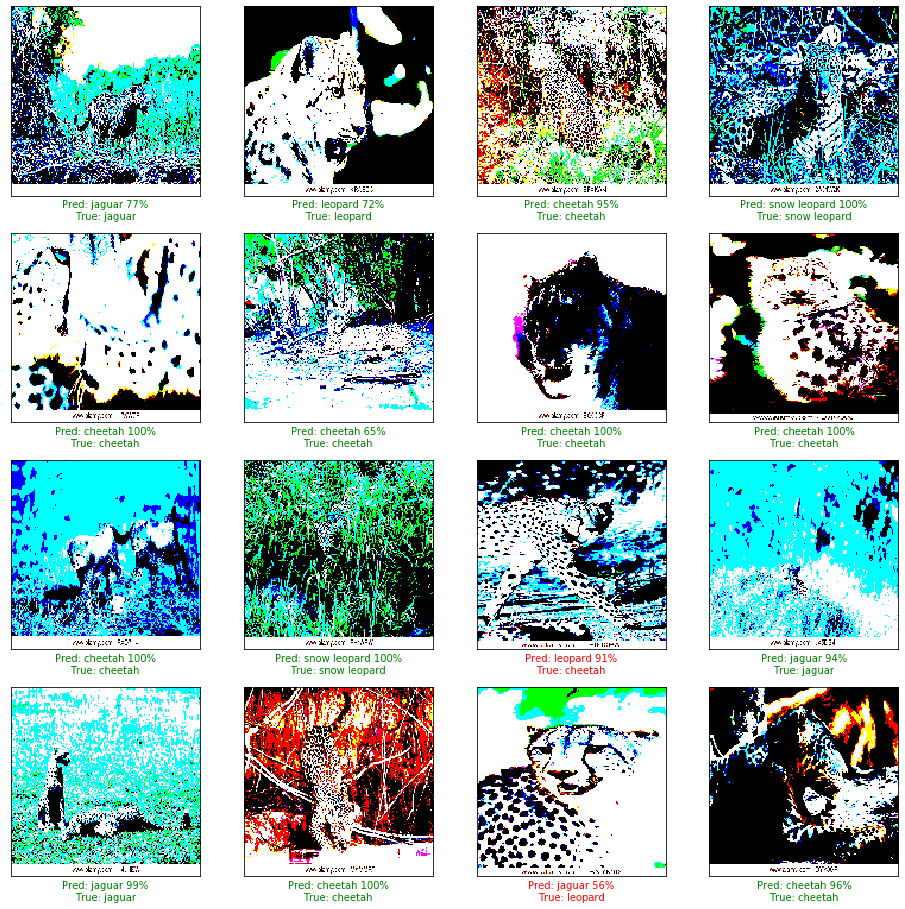

In [54]:
plot_batch(first_preds, first_labels, val_ds[0][0])

Reference:
https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20Image%20Classification%20Keras.ipynb

In [55]:
# list the filepaths associated with the images above
img_paths = np.array(val_ds.filenames)[val_ds.index_array[:BATCH_SIZE:2]]
img_paths

array(['jaguar/jaguar_121.jpg', 'leopard/leopard_114.jpg',
       'cheetah/cheetah_138.jpg', 'snow leopard/b0xccf.jpg',
       'cheetah/cheetah_161.jpg', 'cheetah/cheetah_194.jpg',
       'cheetah/cheetah_171.jpg', 'cheetah/bnym6x.jpg',
       'cheetah/bbkdy7.jpg', 'snow leopard/2b6dey5.jpg',
       'cheetah/b60x20.jpg', 'jaguar/jaguar_152.jpg',
       'jaguar/jaguar_166.jpg', 'cheetah/2bkj609.jpg',
       'leopard/2b1ejbd.jpg', 'cheetah/cheetah_175.jpg'], dtype='<U33')

In [56]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=IMAGE_SIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

In [57]:
imgs = transform_img_fn([os.path.join('dataset', img_path) for img_path in img_paths])
imgs

array([[[[-5.7939003e+01, -1.9778999e+01, -1.6680000e+01],
         [-7.9390030e+00,  3.7221001e+01,  3.6320000e+01],
         [-7.3939003e+01, -2.2778999e+01, -2.5680000e+01],
         ...,
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [ 1.3006100e+02,  1.0022100e+02,  7.2320000e+01]],

        [[-2.9939003e+01, -1.7789993e+00,  6.3199997e+00],
         [-4.5939003e+01, -1.0778999e+01, -5.6800003e+00],
         [-5.4939003e+01, -1.3778999e+01, -9.6800003e+00],
         ...,
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [ 1.3006100e+02,  1.0022100e+02,  7.2320000e+01]],

        [[-1.6939003e+01,  7.2210007e+00,  2.2320000e+01],
         [-5.6939003e+01, -2.6778999e+01, -1.4680000e+01],
         [-4.0939003e+01, -5.7789993e+00,  5.3199997e+00],
         ...,
         [ 1.2706100e+02,  9.9221001e+01,  7.3320000e+01],
         [

## Explanation time

Let's explain the models' prediction for the first listed image.

In [58]:
%load_ext autoreload
%autoreload 2
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
explainer = lime_image.LimeImageExplainer()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


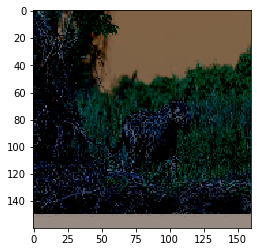

In [60]:
plt.imshow(imgs[0] / 255.)

In [61]:
%%time
explanation = explainer.explain_instance(imgs[0].astype('double'), model.predict,
                                         top_labels=2, hide_color=0, num_samples=800)


CPU times: user 2min 21s, sys: 19.6 s, total: 2min 40s
Wall time: 55.9 s


In [62]:
from skimage.segmentation import mark_boundaries

In [63]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True,
                                            num_features=5, hide_rest=False)

In [88]:
# function that renders preprocessed image to its original colors
orig_color = lambda img: img[:,:, [2,1,0]] / 255. + 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


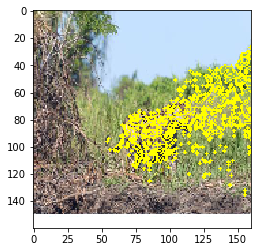

In [89]:
plt.imshow(mark_boundaries(orig_color(temp), mask))

Let's look some images that were "100% predicted correctly".

In [97]:
%%time
explanation = explainer.explain_instance(imgs[2].astype('double'), model.predict,
                                         top_labels=2, hide_color=0, num_samples=800)


CPU times: user 2min 16s, sys: 18.9 s, total: 2min 35s
Wall time: 50.6 s


In [98]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True,
                                            num_features=5, hide_rest=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


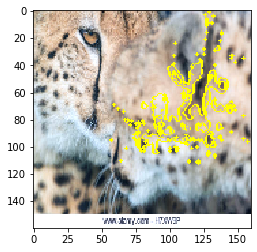

In [99]:
plt.imshow(mark_boundaries(orig_color(temp), mask))